In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import Pacejka52 as pa52
from scipy.optimize import curve_fit

import TMeasy_fit as tm
import TMeasy_Rill_fitting as tr
import TMeasy_Rill as tm_rill

i=501


ModuleNotFoundError: No module named 'TMeasy_fit'

In [14]:
i=501
Fz = 5000
Fz0 = 8000
IA = 0

Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

Fy_pa52 = pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]
Fx_pa52 = pa52.Pacejka52_long(Fz,Sx,IA,Fz0)[0]

#intial guess
Fy_params_init = [-8,1.6,11000,-3]
Fx_params_init = [17,2,9000,0.62]

def func_Fy(Sx,B,C,D,E):
    return pa52.Pacejka5_lat_pa(Sy,Fz,B,C,D,E)

def func_Fx(Sx,B,C,D,E):
    return pa52.Pacejka5_long_pa(Sx,Fz,B,C,D,E)

# perform the optimization
Fy_params, _ = curve_fit(func_Fy, Sy, Fy_pa52, Fy_params_init )
Fx_params, _ = curve_fit(func_Fx, Sx, Fx_pa52, Fx_params_init, maxfev=100000)
 

#plot
Fy_fit = func_Fy(Sy,Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3])
Fx_fit = func_Fx(Sx,Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3])






fig,ax = plt.subplots(1,2, figsize = [13,5])
Sy_plot = np.linspace(-15,15,i)
ax[0].plot(Sy_plot,Fy_fit)
ax[0].plot(Sy_plot,Fy_pa52,'r--')
ax[0].set_xlabel('Schräglaufwinkel [°]')
ax[0].set_xlim(-15,15)
ax[0].set_ylabel('Fz [N]')
ax[0].set_title('lateral Pacejka5 auf Pacejka52 gefittet')
ax[0].legend(['Pacejka5 (gefittet)','Pacejka52 (orginal)'])



ax[1].plot(Sx,Fx_fit)
ax[1].plot(Sx,Fx_pa52,'r--')
ax[1].set_xlabel('Schlupf [%]')
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlim(-1,1)
ax[1].set_title('longitudenal Pacejka5 auf Pacejka52 gefittet')
ax[1].legend(['Pacejka5 (gefittet)','Pacejka52 (orginal)'])

plt.switch_backend('pgf')
fig.savefig('pa5_fit.eps', format='eps')


In [22]:
################################################################################
#vergleich parameter   
################################################################################

print(Fy_params)
print(pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[2],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[3],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[1],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[4])

print(Fx_params)
print(pa52.Pacejka52_long(8000,Sx,IA,Fz0)[2],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[3],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[1],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[4])

[-9.06434405  1.60162373 -1.72069169 -0.80265574]
-9.111787506527305 1.603 8604.3125 -0.57457550825
[17.04378049  1.99996234  1.82504605  0.62177794]
18.566518429399228 2.0 13734.400000000001 510000.0


In [4]:
################################################################################
#TMeasy auf Pacejka52
################################################################################


SX = np.linspace(-1,1,i)
SY = np.linspace(-15,15,i)
LMU = 1

#case 1 -> Fx, case 2 -> Fy

#Parameters
dfx0 = 32529
dfy0 = 30163   # init slopes in N/-
fxm  = 1851.8
fym  = 1604.2   # maximum forces in N
sxm  = 0.2183
sym  = 0.2031   # sm where f(sm) = fm
fxs  = 1188.4
fys  = 1072.7   # sliding forces in N
sxs  = 0.7725
sys  = 0.7978

#intital guess
Fx_tm_params_init = [30000,1800,0.2,1100,0.8]
Fy_tm_params_init = [30000,1800,0.2,1100,0.8]

def Fx_tm_func(SX,dfx0,fxm,sxm,fxs,sxs):
    return tr.TMeasy_single(dfx0,dfy0,fxm,fym,sxm,sym,fxs,fys,sxs,sys,i,1)

def Fy_tm_func(SY,dfy0,fym,sym,fys,sys):
    return tr.TMeasy_single(dfx0,dfy0,fxm,fym,sxm,sym,fxs,fys,sxs,sys,i,2)

Fx_tm_params, _ = curve_fit(Fx_tm_func, SX, Fx_pa52, Fx_tm_params_init,maxfev = 10000)
Fy_tm_params, _ = curve_fit(Fy_tm_func, SY, Fy_pa52, Fy_tm_params_init,maxfev = 10000)

Fx_tm_fit = Fx_tm_func(SX,Fx_tm_params[0],Fx_tm_params[1],Fx_tm_params[2],Fx_tm_params[3],Fx_tm_params[4])
Fy_tm_fit = Fy_tm_func(SY,Fy_tm_params[0],Fy_tm_params[1],Fy_tm_params[2],Fy_tm_params[3],Fy_tm_params[4])

plt.figure(1)
plt.plot(SX,Fx_tm_fit,'r--')
plt.plot(SX,Fx_pa52)
plt.xlabel('slipratio [%]')
plt.ylabel('Fz [N]')
plt.title('lonitudenal TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

plt.figure(2)
plt.plot(SY,Fy_tm_fit,'r--')
plt.plot(SY,Fy_pa52)
plt.xlabel('slipangle [°]')
plt.ylabel('Fz [N]')
plt.title('lateral TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'] )

fig,ax = plt.subplots(2, figsize = [10,5])

ax[0].plot(SX,Fx_tm_fit,'r--')
ax[0].plot(SX,Fx_pa52)
ax[0].set_xlabel('slipratio [%]')
ax[0].set_ylabel('Fz [N]')
ax[0].set_title('lonitudenal TMeasy auf Pacejka52 gefittet')
ax[0].legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

ax[1].plot(SY,Fy_tm_fit,'r--')
ax[1].plot(SY,Fy_pa52)
ax[1].set_xlabel('slipangle [°]')
ax[1].set_ylabel('Fz [N]')
ax[1].set_title('lateral TMeasy auf Pacejka52 gefittet')
ax[1].legend(['TMeasy (gefittet)','Pacejka52 (orginal)'] )

NameError: name 'tr' is not defined

In [24]:
################################################################################
#vergleich parameter TMeasy
################################################################################

print(Fx_tm_params)
print(Fy_tm_params)

[ 6.97899445e+04  9.64500207e+03 -9.19441505e-01  2.73393560e+03
  3.30185693e+02]
[6.68472808e+04 8.67684274e+03 8.90626817e-04 7.16404658e+03
 5.20578263e-01]


Text(0.5, 1.0, 'lateral TMeasy')

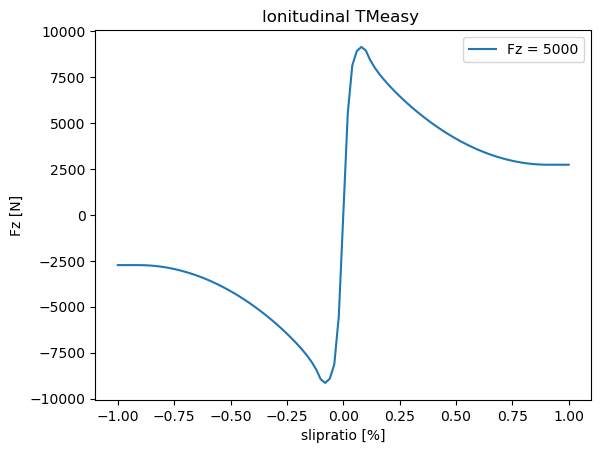

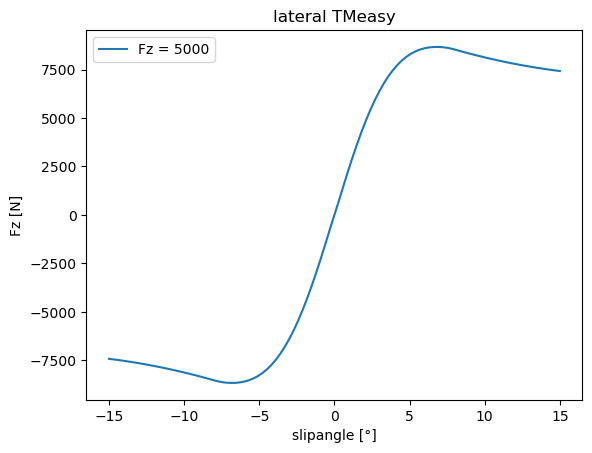

In [25]:
plt.figure(1)
plt.plot(SX,Fx_tm_fit,label = 'Fz = 5000')
plt.legend()
#plt.plot(SX,Fx_pa52)
plt.xlabel('slipratio [%]')
plt.ylabel('Fz [N]')
plt.title('lonitudinal TMeasy ')
#plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

plt.figure(2)
plt.plot(SY,Fy_tm_fit,label = 'Fz = 5000')
plt.legend()
#plt.plot(SY,Fy_pa52)
plt.xlabel('slipangle [°]')
plt.ylabel('Fz [N]')
plt.title('lateral TMeasy')
#plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'] )


In [17]:
#######################################
#TMeasy TUfast/Paco
#######################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit

import TMeasy as tmpa
import Pacejka52 as pa52
import Pacejka52_Sv_Sh_0 as pa0

i = 1000
#für Fy_fit
SX_lat = np.linspace(-1,1,i)
SY_lat = np.linspace(0,0.3,i)
#für Fx fit:
SX_long = np.linspace(0,0.25,i)
SY_long = np.linspace(-0.3,0.3,i)

Sxx = np.linspace(-1,1,i)
Syy = np.linspace(-0.3,0.3,i)

Fz = 1500
Fz0 = 8000
IA = 0

#Daten auf de gefitted wird
Fy_pa52 = pa0.Pacejka52_lat(Fz,SY_lat,IA,Fz0)[0]
Fx_pa52 = pa0.Pacejka52_long(Fz,SX_long,IA,Fz0)[0]

#intial guess
Fy_params_init = [40000, 6000, 4000, 0.1, 0.7, 0.5]
Fx_params_init = [240000, 9000, 4000, 0.1, 0.9, 0.9]

def func_Fy(SY_lat,DFY, FMY, FSY, SMY, SSY,SMX):
    return tmpa.calcFY(SX_lat, SY_lat, DFY, FMY, FSY, SMY, SSY,SMX)

def func_Fx(SX_long,DFX, FMX, FSX, SMX,SSX, SMY):
    return tmpa.calcFx( SX_long, SY_long, DFX, FMX, FSX, SMX,SSX, SMY)

# perform the optimization
Fy_params, _ = curve_fit(func_Fy, SY_lat, Fy_pa52, Fy_params_init )
Fx_params, _ = curve_fit(func_Fx, SX_long, Fx_pa52, Fx_params_init, maxfev=100000)


#plot
Fy_fit = func_Fy(SY_lat,Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3],Fy_params[4],Fy_params[5])
Fx_fit = func_Fx(SX_long,Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3],Fx_params[4],Fx_params[5])

Fy1 = func_Fy(Syy,Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3],Fy_params[4],Fy_params[5])
Fx1 = func_Fx(Sxx,Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3],Fx_params[4],Fx_params[5])

Fy2 = tmpa.calcFY(Sxx, Syy, Fy_params[0], Fy_params[1], Fy_params[2], Fy_params[3], Fy_params[4],Fy_params[5])
Fx2 = tmpa.calcFx( Sxx, Syy, Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3],Fx_params[4],Fx_params[5])

plt.figure(1)
plt.plot(SY_lat,Fy_fit)
plt.plot(SY_lat,Fy_pa52,'r--')
plt.xlabel('slipangle [rad]')
plt.ylabel('Fy [N]')
plt.title('lateral TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])


plt.figure(2)
plt.plot(SX_long,Fx_fit)
plt.plot(SX_long,Fx_pa52,'r--')
plt.xlabel('slipratio [%]')
plt.ylabel('Fx [N]')
plt.title('longitudenal TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

plt.figure(3)
plt.plot(Sxx,Fx1)
plt.plot(Sxx,Fx2, 'r')

plt.figure(4)
plt.plot(Syy,Fy1)
plt.plot(Syy,Fy2, 'r')

c:\Users\bener\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [19]:
print(Fx_params)
print(Fy_params)

Fx_params_alt =  [ 2.36956924e+05, -8.31234170e+03, -3.00584579e+03, -4.20761657e-02, -6.55582132e-01, -1.44859540e+04]
Fy_params_alt = [ 1.23377206e+05 , 8.58917745e+03 , 8.03274447e+03 , 1.30480776e-01,-6.02817710e-01,  1.41762125e+03]

plt.figure(1)
Sxx = np.linspace(-1,1,1000)
Syy = np.linspace(-0.3,0.3,1000)
Fxx_fit = tmpa.calcFx( Sxx, Syy, Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3],Fx_params[4],Fx_params[5])
Fxx_pa52 = pa0.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]
plt.plot(Sxx,Fxx_fit)
plt.plot(Sxx,Fxx_pa52)

plt.figure(2, figsize=(10,10))
Fyy_fit = tmpa.calcFY( Sxx, Syy, Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3],Fy_params[4],Fy_params[5])
Fyy_pa52 = pa52.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]
Fyy_pa0 = pa0.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]
plt.plot(Syy,Fyy_fit, label ='TMeasy fit')
plt.plot(Syy,Fyy_pa52, label = 'Pacejka params Indy')
plt.plot(Syy,Fyy_pa0,'r--', label = 'Pacejka Sv,Sh =0')
plt.legend()

[6.99386694e+05 3.10459078e+03 2.01998289e+03 1.84740136e-02
 2.85868610e-01 1.43394648e-01]
[ 1.32353620e+05  2.73913262e+03  2.63463469e+04  3.11097227e-01
 -4.37995923e+00  3.77775585e+00]


In [ ]:
139524.9778222991
1
6994.2466072766
2
6202.2095010615
3
0.1449628087
4
0.3117939862
5
1.2911811431